# Setting up environment

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(tf.__version__)

import numpy as np
import scipy.misc

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

import time


1.14.0


# Problem 1

## (a)

### Data Preprocessing

First, read the data

In [2]:
import os, time
import itertools, imageio, pickle
import tensorflow as tf

import numpy as np
from numpy import array


print(tf.test.is_gpu_available())

print(tf.__version__)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

sizePixel1 = 512
sizePixel2 = sizePixel1*sizePixel1

size_d = 32


batch_size = 30
train_epoch = 100

# should change 
folder = 'C:/Users/72313/Desktop/哥大/IEORE 4742 - Deep Learning/data'

pngLocation = 'Fixed_results'

root = 'outputConGANs/'
model = 'DCGAN_con_run2_'

# Though it's not possible to get the path to the notebook by __file__, os.path is still very useful in dealing with paths and files
# In this case, we can use an alternative: pathlib.Path
"""
code_dir   = os.path.dirname(__file__)
"""


#get the current path of our code
code_dir = 'C:/Users/72313/Desktop/哥大/IEORE 4742 - Deep Learning/'
print("--------------------------")
code_dir
print(code_dir)
print("--------------------------")
#create output_dir within the same path
output_dir = code_dir + 'outputConGANs/'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

False
1.14.0
--------------------------
C:/Users/72313/Desktop/哥大/IEORE 4742 - Deep Learning/
--------------------------


In [3]:
def read_tensor_from_image_file(path, input_height=sizePixel1, input_width=sizePixel1, input_mean=0, input_std=255):
    
    input_name = "file_reader"
    output_name = "normalized"
    file_reader = tf.read_file(path, input_name)
    image_reader = tf.image.decode_png(file_reader, channels = 1)
    float_caster = tf.cast(image_reader, tf.float32)
    dims_expander = tf.expand_dims(float_caster, 0);
    resized = tf.image.resize_bilinear(dims_expander, [input_height, input_width])
    normalized = tf.divide(tf.subtract(resized, [input_mean]), [input_std])
    sess = tf.Session()
    result = sess.run(normalized)
    return result 

In [4]:
nSeries = 300
numInSeries = 1
nImages = nSeries*numInSeries #222
img  = np.zeros((nImages, sizePixel1,sizePixel1))


counter = 0
for j in range(0,numInSeries):
    for i in range(1,nSeries+1):
        print(counter,i,j)
        fname = 'Untitled' + str(i) + '.png'
        path = folder + '/' + fname
        orig_img = read_tensor_from_image_file(path)
        # vectorize
        #img[counter] = orig_img.reshape(-1)
        
        # original size
        img[counter] = orig_img.reshape(sizePixel1,sizePixel1)
        counter = counter+1

0 1 0
1 2 0
2 3 0
3 4 0
4 5 0
5 6 0
6 7 0
7 8 0
8 9 0
9 10 0
10 11 0
11 12 0
12 13 0
13 14 0
14 15 0
15 16 0
16 17 0
17 18 0
18 19 0
19 20 0
20 21 0
21 22 0
22 23 0
23 24 0
24 25 0
25 26 0
26 27 0
27 28 0
28 29 0
29 30 0
30 31 0
31 32 0
32 33 0
33 34 0
34 35 0
35 36 0
36 37 0
37 38 0
38 39 0
39 40 0
40 41 0
41 42 0
42 43 0
43 44 0
44 45 0
45 46 0
46 47 0
47 48 0
48 49 0
49 50 0
50 51 0
51 52 0
52 53 0
53 54 0
54 55 0
55 56 0
56 57 0
57 58 0
58 59 0
59 60 0
60 61 0
61 62 0
62 63 0
63 64 0
64 65 0
65 66 0
66 67 0
67 68 0
68 69 0
69 70 0
70 71 0
71 72 0
72 73 0
73 74 0
74 75 0
75 76 0
76 77 0
77 78 0
78 79 0
79 80 0
80 81 0
81 82 0
82 83 0
83 84 0
84 85 0
85 86 0
86 87 0
87 88 0
88 89 0
89 90 0
90 91 0
91 92 0
92 93 0
93 94 0
94 95 0
95 96 0
96 97 0
97 98 0
98 99 0
99 100 0
100 101 0
101 102 0
102 103 0
103 104 0
104 105 0
105 106 0
106 107 0
107 108 0
108 109 0
109 110 0
110 111 0
111 112 0
112 113 0
113 114 0
114 115 0
115 116 0
116 117 0
117 118 0
118 119 0
119 120 0
120 121 0
121 122 

Now we have img, which is a **300\*512\*512** array. Then shuffle the image:

In [23]:
#load data. labels are in one-hot-encoding format
#generate original training and test data
x_train = np.reshape(img, [-1, sizePixel2])
train_num_examples = x_train.shape[0]
print(train_num_examples)

300


In [27]:
#data size: 512*512
X = tf.placeholder(tf.float32, shape=[None, 512*512])
Z = tf.placeholder(tf.float32, shape=[None, 100])

### Set up parameters for generator and discriminator

In [28]:
# Generator
# Define the variables for the generator, we will use them to build layers later
# -------------------
size_g_w1 = 100
size_g_b1 = 128
# A good way to decide the std for initializing the weights
w1_std = 1.0/tf.sqrt(size_g_w1/2.0)

G_W1 = tf.Variable(tf.random_normal(shape=[size_g_w1, size_g_b1], stddev=w1_std))
G_b1 = tf.Variable(tf.zeros(shape=[size_g_b1]))

size_g_w2 = 128
size_g_b2 = 512*512
w2_std = 1.0/tf.sqrt(size_g_w2/2.0)

G_W2 = tf.Variable(tf.random_normal(shape=[size_g_w2, size_g_b2], stddev=w2_std))
G_b2 = tf.Variable(tf.zeros(shape=[size_g_b2]))
# theta_G and theta_D will be feeded to different optimizers later as "var_list", 
# since currently we have two networks instead of one now.
theta_G = [G_W1, G_W2, G_b1, G_b2]

# ====================
# Discriminator
# Define the variables for the discriminator
# --------------------
size_d_w1 = 512*512
size_d_b1 = 128
w1_std = 1.0/tf.sqrt(size_d_w1/2.0)

D_W1 = tf.Variable(tf.random_normal(shape=[size_d_w1,size_d_b1], stddev=w1_std))
D_b1 = tf.Variable(tf.zeros(shape=[size_d_b1]))

size_d_w2 = 128
size_d_b2 = 1
w2_std = 1.0/tf.sqrt(size_d_w2/2.0)

D_W2 = tf.Variable(tf.random_normal(shape=[size_d_w2,size_d_b2], stddev=w2_std))
D_b2 = tf.Variable(tf.zeros(shape=[size_d_b2]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

### Generator module

In [29]:
def generator(z):

    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_logit = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_logit)

    return G_prob, G_logit


### Discriminator module

In [30]:
def discriminator(x):

    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

### Generate samples function

In [31]:
def sample_z(m, n):
    # randomly generate samples for generator
    return np.random.uniform(-1.0, 1.0, size = [m, n])

### Plotting samples

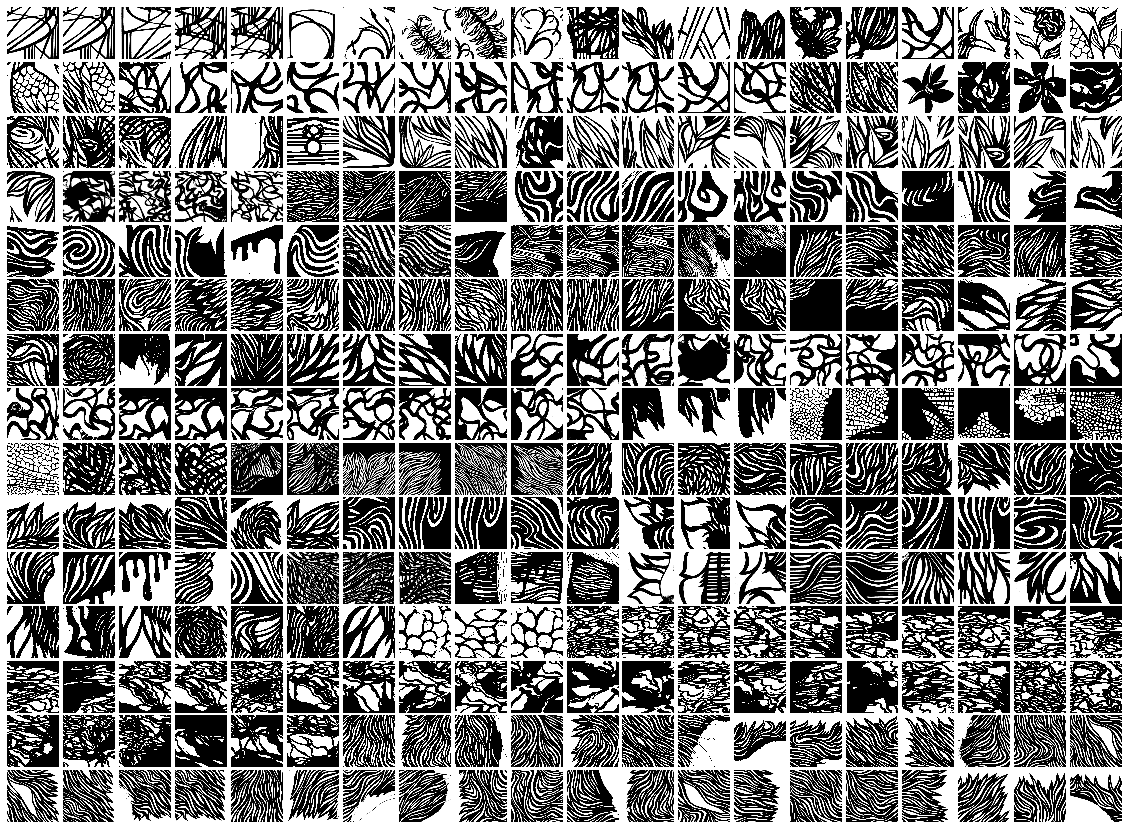

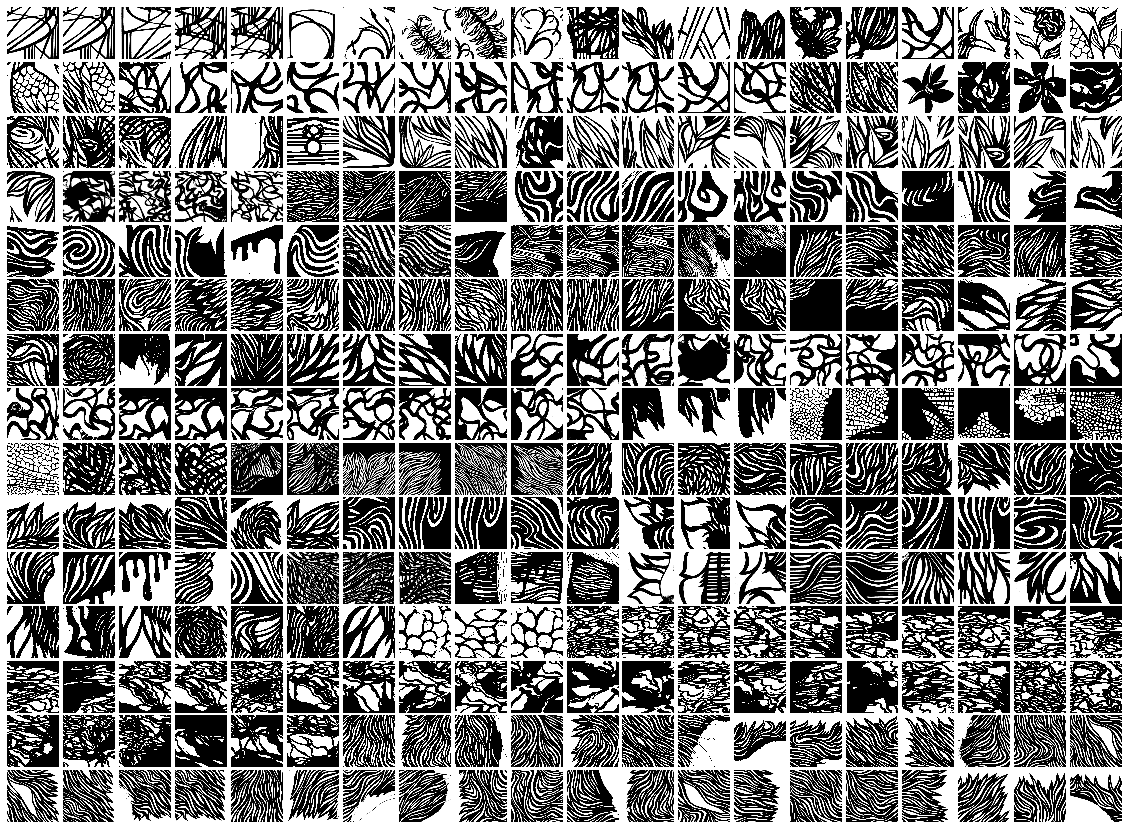

In [35]:
def plot_sample(samples, size1, size2):
    
    fig1 = plt.figure(figsize=(size1, size2))
    gs = gridspec.GridSpec(size1, size2)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(512, 512), cmap='gray')

    return fig1

plot_sample(img,20,20)

### Faciliate the path defining process

In [32]:
# Though it's not possible to get the path to the notebook by __file__, os.path is still very useful in dealing with paths and files
# In this case, we can use an alternative: pathlib.Path
"""
code_dir   = os.path.dirname(__file__)
"""

from pathlib import Path
#get the current path of our code
code_dir = Path().resolve()
#create output_dir within the same path
output_dir = os.path.join(code_dir, 'outputGANs2/')
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

### Build GNN with defined vars and functions

In [33]:
# Put randomly generated sample Z into the generator to create "fake" images
G_sample, _ = generator(Z)
# The result of discriminator of real and fake samples
_, D_logit_real = discriminator(X)
_, D_logit_fake = discriminator(G_sample)

# generator loss 
# the goal of generator is to let discriminator make more mistakes on fake samples
# tf.ones_like returns a tensor with all elements set to 1
# 0 represent fake and 1 means real
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

# discriminator loss 
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Start the session

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# the dimension of the random samples
z_dim = 100

result_freq = 500

# plot generators' output every figure_iter step
figure_iter = 500

max_iter = 5000

size1 = 20
size2 = 20

i = 0

total_batch = int((train_num_examples+batch_size-1) / batch_size)

for iter in range(max_iter+1):
    
    if iter % figure_iter == 0:
        
        # G_sample is a sample from the generator
        samples = sess.run(G_sample, feed_dict={Z: sample_z(size1*size2, z_dim)})

        fig1 = plot_sample(samples, size1, size2)
        plt.savefig(output_dir + 'GANs' + str(i) + '.png', bbox_inches='tight')
        i += 1
        plt.close(fig1)

    j = iter%total_batch
    start = j * batch_size
    end = min(train_num_examples, start + batch_size)
    batch_xs = x_train[start:end]


    _, discriminator_loss = sess.run([D_solver, D_loss], feed_dict={X: batch_xs, Z: sample_z(batch_size, z_dim)})
    _, generator_loss     = sess.run([G_solver, G_loss], feed_dict={Z: sample_z(batch_size, z_dim)})

    if iter % result_freq == 0:
        
        print('iteration: {}'.format(iter))
        print('D_loss: {:0.4}'.format(discriminator_loss))
        print('G_loss: {:0.4}'.format(generator_loss))
        print()

iteration: 0
D_loss: 1.45
G_loss: 130.7

iteration: 500
D_loss: 0.0002802
G_loss: 31.9

iteration: 1000
D_loss: 3.166
G_loss: 1.886

iteration: 1500
D_loss: 1.156
G_loss: 1.115

iteration: 2000
D_loss: 0.1298
G_loss: 3.665

iteration: 2500
D_loss: 0.2882
G_loss: 5.103

iteration: 3000
D_loss: 1.455
G_loss: 1.369

iteration: 3500
D_loss: 0.5231
G_loss: 1.563

iteration: 4000
D_loss: 0.3526
G_loss: 1.895

iteration: 4500
D_loss: 0.7372
G_loss: 2.647

iteration: 5000
D_loss: 0.5868
G_loss: 1.778



### Plot after training

Here is the plot generated after 5000 iterations:

![Gan](GANs10.png)

Compared to the original plot, GAN does not train so well. I find some information from https://github.com/uclaacmai/Generative-Adversarial-Network-Tutorial: "One note that I’d like to make is that GANs are notoriously difficult to train. Without the right hyperparameters, network architecture, and training procedure, there is a high chance that either the generator or discriminator will overpower the other."

Therefore, it may be very difficult to have a desired result.

## (b) Create images by autoencoders

In [7]:
# 3 hidden layers for encoder
n_encoder_h_1 = 100
n_encoder_h_2 = 50
n_encoder_h_3 = 25

# 3 hidden layers for decoder
n_decoder_h_1 = 25
n_decoder_h_2 = 50
n_decoder_h_3 = 100

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 15
display_step = 1

def layer_batch_normalization(x, n_out, phase_train):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - n_out: integer, depth of input maps - number of sample in the batch 
        - phase_train: boolean tf.Varialbe, true indicates training phase
    output:
        - batch-normalized maps   
    
    
    """

    beta_init = tf.constant_initializer(value=0.0, dtype=tf.float32)
    beta = tf.get_variable("beta", [n_out], initializer=beta_init)
    
    gamma_init = tf.constant_initializer(value=1.0, dtype=tf.float32)
    gamma = tf.get_variable("gamma", [n_out], initializer=gamma_init)

    #tf.nn.moment: https://www.tensorflow.org/api_docs/python/tf/nn/moments
    #calculate mean and variance of x
    batch_mean, batch_var = tf.nn.moments(x, [0], name='moments')
    
    #tf.train.ExponentialMovingAverage:
    #https://www.tensorflow.org/api_docs/python/tf/train/ExponentialMovingAverage
    #Maintains moving averages of variables by employing an exponential decay.
    ema = tf.train.ExponentialMovingAverage(decay=0.9)
    ema_apply_op = ema.apply([batch_mean, batch_var])
    ema_mean, ema_var = ema.average(batch_mean), ema.average(batch_var)
    
    def mean_var_with_update():
        with tf.control_dependencies([ema_apply_op]):
            return tf.identity(batch_mean), tf.identity(batch_var)
        
    #tf.cond: https://www.tensorflow.org/api_docs/python/tf/cond
    #Return true_fn() if the predicate pred is true else false_fn()
    mean, var = tf.cond(phase_train, mean_var_with_update, lambda: (ema_mean, ema_var))

    reshaped_x = tf.reshape(x, [-1, 1, 1, n_out])
    normed = tf.nn.batch_norm_with_global_normalization(reshaped_x, mean, var, beta, gamma, 1e-3, True)
    
    return tf.reshape(normed, [-1, n_out])

In [8]:
def layer(x, weight_shape, bias_shape, phase_train):
    
    """
    Defines the network layers
    
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
        - phase_train: boolean tf.Varialbe, true indicates training phase
        
    output:
        - output vector of the layer after the matrix multiplication
         
        
    """
    
    #initialize weights
    weight_init = tf.random_normal_initializer(stddev=(1.0/weight_shape[0])**0.5)
    W = tf.get_variable("W", weight_shape, initializer=weight_init)
    
    bias_init = tf.constant_initializer(value=0)
    b = tf.get_variable("b", bias_shape, initializer=bias_init)

    logits = tf.matmul(x, W) + b
    
    #important: do not apply any non-linear function after the batch normalization
    return layer_batch_normalization(logits, weight_shape[1], phase_train)

In [9]:
def encoder(x, n_code, phase_train):
    
    """
    Defines the network encoder part
    input:
        - x: input vector of the encoder
        - n_code: number of neurons in the code layer (output of the encoder - input of the decoder)
        - phase_train: boolean tf.Varialbe, true indicates training phase
    output:
        - output vector: reduced dimension
    """
    
    with tf.variable_scope("encoder"):
        
        with tf.variable_scope("h_1"):
            h_1 = layer(x, [512*512, n_encoder_h_1], [n_encoder_h_1], phase_train)

        with tf.variable_scope("h_2"):
            h_2 = layer(h_1, [n_encoder_h_1, n_encoder_h_2], [n_encoder_h_2], phase_train)

        with tf.variable_scope("h_3"):
            h_3 = layer(h_2, [n_encoder_h_2, n_encoder_h_3], [n_encoder_h_3], phase_train)

        with tf.variable_scope("code"):
            output = layer(h_3, [n_encoder_h_3, n_code], [n_code], phase_train)

    return output

In [10]:
def decoder(x, n_code, phase_train):
    """
    Defines the network encoder part
    input:
        - x: input vector of the decoder - reduced dimension vector
        - n_code: number of neurons in the code layer (output of the encoder - input of the decoder) 
        - phase_train: boolean tf.Variablle, true indicates training phase
    output:
        - output vector: reconstructed dimension of the initial vector
    """
    
    with tf.variable_scope("decoder"):
        
        with tf.variable_scope("h_1"):
            h_1 = layer(x, [n_code, n_decoder_h_1], [n_decoder_h_1], phase_train)

        with tf.variable_scope("h_2"):
            h_2 = layer(h_1, [n_decoder_h_1, n_decoder_h_2], [n_decoder_h_2], phase_train)

        with tf.variable_scope("h_3"):
            h_3 = layer(h_2, [n_decoder_h_2, n_decoder_h_3], [n_decoder_h_3], phase_train)

        with tf.variable_scope("output"):
            output = layer(h_3, [n_decoder_h_3, 512*512], [512*512], phase_train)

    return output

In [11]:
def loss(output, x):
    """
    Compute the loss of the auto-encoder
    
    intput:
        - output: the output of the decoder
        - x: true value of the sample batch - this is the input of the encoder
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    
    with tf.variable_scope("training"):
        
        l2 = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(output, x)), 1))
        train_loss = tf.reduce_mean(l2)
        train_summary_op = tf.summary.scalar("train_cost", train_loss)
        return train_loss, train_summary_op

In [12]:
def training(cost, global_step):
    """
    defines the necessary elements to train the network
    
    intput:
        - cost: the cost is the loss of the corresponding batch
        - global_step: number of batch seen so far, it is incremented by one 
        each time the .minimize() function is called
    """
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [13]:
def evaluate(output, x):
    """
    evaluates the accuracy on the validation set 
    input:
        -output: prediction vector of the network for the validation set
        -x: true value for the validation set
    output:
        - val_loss: loss of the autoencoder
        - in_image_op: input image 
        - out_image_op:reconstructed image 
        - val_summary_op: summary of the loss
    """
    
    with tf.variable_scope("validation"):
        
        in_image_op = image_summary("input_image", x)
        
        out_image_op = image_summary("output_image", output)
        
        l2_norm = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(output, x, name="val_diff")), 1))
        
        val_loss = tf.reduce_mean(l2_norm)
        
        val_summary_op = tf.summary.scalar("val_cost", val_loss)
        
        return val_loss, in_image_op, out_image_op, val_summary_op

In [14]:
def image_summary(label, tensor):
    #tf.summary.image: https://www.tensorflow.org/api_docs/python/tf/summary/image
    #Outputs a Summary protocol buffer with images.

    tensor_reshaped = tf.reshape(tensor, [-1, 512, 512, 1])
    return tf.summary.image(label, tensor_reshaped)

In [54]:
if __name__ == '__main__':

    #if a python file, please use the 4 lines bellow and comment the "n_code = '1'"
    #parser = argparse.ArgumentParser(description='Autoencoder')
    #parser.add_argument('n_code', nargs=1, type=str)
    #args = parser.parse_args(['--help'])
    #n_code = args.n_code[0]
    
    #if a jupyter file, please comment the 4 above and use the one bellow
    n_code = '2'
    
    #feel free to change with your own 
    if not os.path.isdir('./logs/'):
        os.makedirs('./logs/')
    log_files_path = './logs/'

    with tf.Graph().as_default():

        with tf.variable_scope("autoencoder_model"):

            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label, phase_train is a boolean 
            x = tf.placeholder("float", [None, 512*512]) # MNIST data image of shape 28*28=784
            
            phase_train = tf.placeholder(tf.bool)
            
            #define the encoder 
            code = encoder(x, int(n_code), phase_train)
            
            #define the decoder
            output = decoder(code, int(n_code), phase_train)
            
            #compute the loss 
            cost, train_summary_op = loss(output, x)

            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)

            train_op = training(cost, global_step)

            #evaluate the accuracy of the network (done on a validation set)
            eval_op, in_image_op, out_image_op, val_summary_op = evaluate(output, x)

            summary_op = tf.summary.merge_all()

            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver(max_to_keep=200)

            #defines a session
            sess = tf.Session()

            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            train_writer = tf.summary.FileWriter(log_files_path + 'mnist_autoencoder_linear_' + n_code + '_logs/', graph=sess.graph)

            val_writer   = tf.summary.FileWriter(log_files_path + 'mnist_autoencoder_linear_' + n_code + '_logs/', graph=sess.graph)

            #initialization of the variables
            init_op = tf.global_variables_initializer()

            sess.run(init_op)

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
                
                # Loop over all batches
                for i in range(total_batch):
                    
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    _, new_cost, train_summary = sess.run([train_op, cost, train_summary_op], feed_dict={x: minibatch_x, phase_train: True})
                    
                    train_writer.add_summary(train_summary, sess.run(global_step))
                    
                    # Compute average loss
                    avg_cost += new_cost/total_batch
                
                # Display logs per epoch step
                if epoch % display_step == 0:
                    print("Epoch:", '%04d' % (epoch+1), "cost =", "{:.9f}".format(avg_cost))

                    #the accuracy is evaluated using the validation dataset
                    train_writer.add_summary(train_summary, sess.run(global_step))


                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'mnist_autoencoder_linear_' + n_code + '_logs/model-checkpoint-' + '%04d' % (epoch+1), global_step=global_step)


Epoch: 0001 cost = 560.375872803
Epoch: 0002 cost = 506.710662842
Epoch: 0003 cost = 474.288281250
Epoch: 0004 cost = 455.947842407
Epoch: 0005 cost = 446.240795898
Epoch: 0006 cost = 437.129367065
Epoch: 0007 cost = 431.753713989
Epoch: 0008 cost = 413.884638977
Epoch: 0009 cost = 400.679063416
Epoch: 0010 cost = 391.144474792
Epoch: 0011 cost = 385.197984314
Epoch: 0012 cost = 379.500758362
Epoch: 0013 cost = 372.280136108
Epoch: 0014 cost = 367.573873901
Epoch: 0015 cost = 359.656529236
Epoch: 0016 cost = 353.895089722
Epoch: 0017 cost = 349.302799988
Epoch: 0018 cost = 344.586912537
Epoch: 0019 cost = 339.996125793
Epoch: 0020 cost = 335.781536865


**After training the autoencoder, I generate the images by following code:**



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Starting Autoencoder ./logs/mnist_autoencoder_linear_2_logs/model-checkpoint-0020-400


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./logs/mnist_autoencoder_linear_2_logs/model-checkpoint-0020-400
Model restored from file: None
Running Autoencoder & Re-Constructing




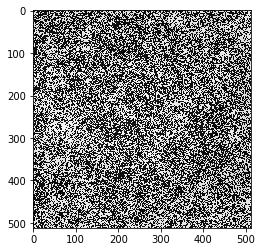

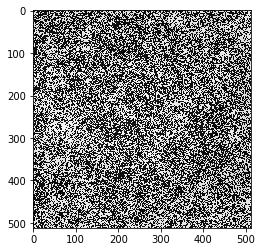

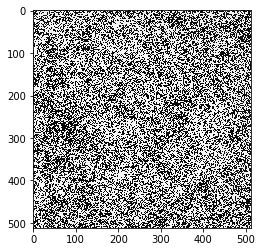

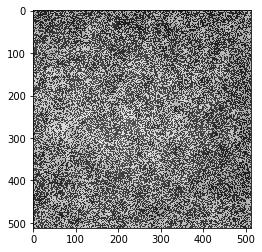

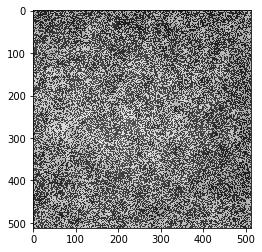

In [15]:
import argparse
log_files_path = './logs/'
n_code = '2'
args_savepath = log_files_path + 'mnist_autoencoder_linear_' + n_code + '_logs/model-checkpoint-0020-400'
with tf.Graph().as_default():

    with tf.variable_scope("autoencoder_model"):

        x = tf.placeholder("float", [None, 512*512]) # MNIST data image of shape 28*28=784
            
        phase_train = tf.placeholder(tf.bool)

        code = encoder(x, int(n_code), phase_train)

        output = decoder(code, int(n_code), phase_train)

        cost, train_summary_op = loss(output, x)

        global_step = tf.Variable(0, name='global_step', trainable=False)

        train_op = training(cost, global_step)

        eval_op, in_imagine_op, out_imagine_op, val_summary_op = evaluate(output, x)

            #saver = tf.train.Saver()
            #sess = tf.Session()

        print('Starting Autoencoder', args_savepath ) #args.savepath[0]
        print('\n')
            
        sess = tf.Session()
        saver = tf.train.Saver()
        save_path = saver.restore(sess, args_savepath ) #args.savepath[0]
        print("Model restored from file: %s" % save_path)

        print('Running Autoencoder & Re-Constructing')
        print('\n')

        ae_codes, ae_reconstruction = sess.run([code, output], feed_dict={x: x_train*np.random.randint(2, size=(512*512)), phase_train: True})
            
        #plt.scatter(ae_codes, mnist.test.labels)
            
            
        for i in range(5):
            plt.imshow(ae_reconstruction[i].reshape((512,512)), cmap=plt.cm.gray)
            plt.show()

Then add the images generated by auto encoder to original training data

In [25]:
x_train = np.concatenate((x_train, ae_reconstruction))
x_train.shape

(600, 262144)

**Then we come to another autoencoder, I would change the hyper parameters for the hidden layer**

In [17]:
# 3 hidden layers for encoder
# but n_hidden_layer changes
n_encoder_h_1 = 80
n_encoder_h_2 = 40
n_encoder_h_3 = 20

# 3 hidden layers for decoder
# but n_hidden_layer changes
n_decoder_h_1 = 20
n_decoder_h_2 = 40
n_decoder_h_3 = 80

# Parameters
# change learning rate, batchsize
learning_rate = 0.02
training_epochs = 10
batch_size = 30
display_step = 1

In [22]:
if __name__ == '__main__':

    #if a python file, please use the 4 lines bellow and comment the "n_code = '1'"
    #parser = argparse.ArgumentParser(description='Autoencoder')
    #parser.add_argument('n_code', nargs=1, type=str)
    #args = parser.parse_args(['--help'])
    #n_code = args.n_code[0]
    
    #if a jupyter file, please comment the 4 above and use the one bellow
    n_code = '2'
    
    #feel free to change with your own 
    if not os.path.isdir('./logs/'):
        os.makedirs('./logs/')
    log_files_path = './logs/'

    with tf.Graph().as_default():

        with tf.variable_scope("autoencoder_model"):

            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label, phase_train is a boolean 
            x = tf.placeholder("float", [None, 512*512]) # MNIST data image of shape 28*28=784
            
            phase_train = tf.placeholder(tf.bool)
            
            #define the encoder 
            code = encoder(x, int(n_code), phase_train)
            
            #define the decoder
            output = decoder(code, int(n_code), phase_train)
            
            #compute the loss 
            cost, train_summary_op = loss(output, x)

            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)

            train_op = training(cost, global_step)

            #evaluate the accuracy of the network (done on a validation set)
            eval_op, in_image_op, out_image_op, val_summary_op = evaluate(output, x)

            summary_op = tf.summary.merge_all()

            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver(max_to_keep=200)

            #defines a session
            sess = tf.Session()

            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            train_writer = tf.summary.FileWriter(log_files_path + 'mnist_autoencoder_linear_2_' + n_code + '_logs/', graph=sess.graph)

            val_writer   = tf.summary.FileWriter(log_files_path + 'mnist_autoencoder_linear_2_' + n_code + '_logs/', graph=sess.graph)

            #initialization of the variables
            init_op = tf.global_variables_initializer()

            sess.run(init_op)

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
                
                # Loop over all batches
                for i in range(total_batch):
                    
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    _, new_cost, train_summary = sess.run([train_op, cost, train_summary_op], feed_dict={x: minibatch_x, phase_train: True})
                    
                    train_writer.add_summary(train_summary, sess.run(global_step))
                    
                    # Compute average loss
                    avg_cost += new_cost/total_batch
                
                # Display logs per epoch step
                if epoch % display_step == 0:
                    print("Epoch:", '%04d' % (epoch+1), "cost =", "{:.9f}".format(avg_cost))

                    #the accuracy is evaluated using the validation dataset
                    train_writer.add_summary(train_summary, sess.run(global_step))


                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'mnist_autoencoder_linear_2_' + n_code + '_logs/model-checkpoint-' + '%04d' % (epoch+1), global_step=global_step)


Epoch: 0001 cost = 556.142626953
Epoch: 0002 cost = 515.516442871
Epoch: 0003 cost = 482.441433716
Epoch: 0004 cost = 459.261206055
Epoch: 0005 cost = 440.442535400
Epoch: 0006 cost = 428.759027100
Epoch: 0007 cost = 424.620373535
Epoch: 0008 cost = 422.914889526
Epoch: 0009 cost = 410.762475586
Epoch: 0010 cost = 408.304360962


**Also, get the generated images and add them into training samples. This would allow us to get 900 training samples in total.**

Starting Autoencoder ./logs/mnist_autoencoder_linear_2_2_logs/model-checkpoint-0010-100


INFO:tensorflow:Restoring parameters from ./logs/mnist_autoencoder_linear_2_2_logs/model-checkpoint-0010-100
Model restored from file: None
Running Autoencoder & Re-Constructing




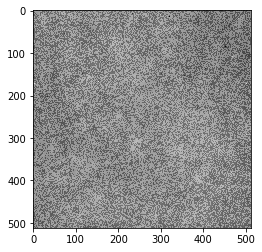

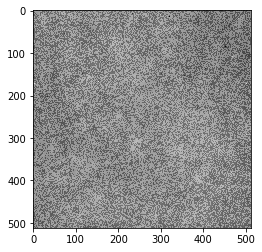

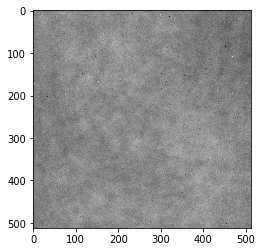

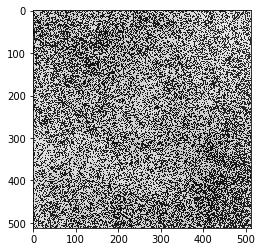

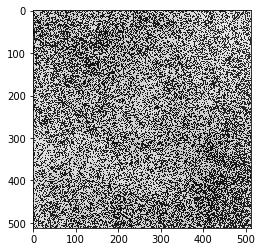

In [24]:
# import argparse
# log_files_path = './logs/'
# n_code = '2'
args_savepath = log_files_path + 'mnist_autoencoder_linear_2_' + n_code + '_logs/model-checkpoint-0010-100'
with tf.Graph().as_default():

    with tf.variable_scope("autoencoder_model"):

        x = tf.placeholder("float", [None, 512*512]) # MNIST data image of shape 28*28=784
            
        phase_train = tf.placeholder(tf.bool)

        code = encoder(x, int(n_code), phase_train)

        output = decoder(code, int(n_code), phase_train)

        cost, train_summary_op = loss(output, x)

        global_step = tf.Variable(0, name='global_step', trainable=False)

        train_op = training(cost, global_step)

        eval_op, in_imagine_op, out_imagine_op, val_summary_op = evaluate(output, x)

            #saver = tf.train.Saver()
            #sess = tf.Session()

        print('Starting Autoencoder', args_savepath ) #args.savepath[0]
        print('\n')
            
        sess = tf.Session()
        saver = tf.train.Saver()
        save_path = saver.restore(sess, args_savepath ) #args.savepath[0]
        print("Model restored from file: %s" % save_path)

        print('Running Autoencoder & Re-Constructing')
        print('\n')

        ae_codes, ae_reconstruction_2 = sess.run([code, output], feed_dict={x: x_train*np.random.randint(2, size=(512*512)), phase_train: True})
            
        #plt.scatter(ae_codes, mnist.test.labels)
            
            
        for i in range(5):
            plt.imshow(ae_reconstruction_2[i].reshape((512,512)), cmap=plt.cm.gray)
            plt.show()

In [26]:
x_train = np.concatenate((x_train, ae_reconstruction_2))
x_train.shape

(900, 262144)

## (c) Retrain the Gan with 900 samples

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Now train with 900 samples
train_num_examples = 900
batch_size = 30
# the dimension of the random samples
z_dim = 100

result_freq = 500

# plot generators' output every figure_iter step
figure_iter = 500

max_iter = 5000

size1 = 20
size2 = 20

i = 0

total_batch = int((train_num_examples+batch_size-1) / batch_size)

for iter in range(max_iter+1):
    
    if iter % figure_iter == 0:
        
        # G_sample is a sample from the generator
        samples = sess.run(G_sample, feed_dict={Z: sample_z(size1*size2, z_dim)})

        fig1 = plot_sample(samples, size1, size2)
        plt.savefig(output_dir + 'GANs' + str(i) + '.png', bbox_inches='tight')
        i += 1
        plt.close(fig1)

    j = iter%total_batch
    start = j * batch_size
    end = min(train_num_examples, start + batch_size)
    batch_xs = x_train[start:end]


    _, discriminator_loss = sess.run([D_solver, D_loss], feed_dict={X: batch_xs, Z: sample_z(batch_size, z_dim)})
    _, generator_loss     = sess.run([G_solver, G_loss], feed_dict={Z: sample_z(batch_size, z_dim)})

    if iter % result_freq == 0:
        
        print('iteration: {}'.format(iter))
        print('D_loss: {:0.4}'.format(discriminator_loss))
        print('G_loss: {:0.4}'.format(generator_loss))
        print()

iteration: 0
D_loss: 1.433
G_loss: 49.59

iteration: 500
D_loss: 38.13
G_loss: 317.3

iteration: 1000
D_loss: 4.34e-37
G_loss: 1.098e+03

iteration: 1500
D_loss: 7.711
G_loss: 231.4

iteration: 2000
D_loss: 219.7
G_loss: 863.8

iteration: 2500
D_loss: 11.6
G_loss: 225.4

iteration: 3000
D_loss: 2.554
G_loss: 83.41

iteration: 3500
D_loss: 19.42
G_loss: 28.17

iteration: 4000
D_loss: 57.55
G_loss: 36.69

iteration: 4500
D_loss: 107.8
G_loss: 16.79

iteration: 5000
D_loss: 21.35
G_loss: 7.094



### Image after 5000 iterations

Here is the image generated after 5000 iterations:

![GANs10_2.png](GANs10_2.png)

## (d) Compare results in (a) and (c)

After 5000 iterations, part (a) has lower loss for generator and discriminator (**D_loss: 0.5868, G_loss: 1.778**). But part (c) has a much higher loss for both (**D_loss: 21.35, G_loss: 7.094**). In my opinion, this is because the autoencoder has not been trained very well to make the new training samples successfully represent the original ones. 

With the old samples, the discriminator at least was trained well, but the new training samples also make discriminator work less well. And the new training samples also distort the generator.

# Problem 2

**First, though kernel sizes are commonly odd, we let it be 4 because it can be divided by 4096**

#### Generator

1. Input: vectors with shape (1,100)

2. First Hidden Layer: kernel size (4,4), filter number: 256, strides = (1,1)

3. Second Hidden Layer: Kernel size (4,4), filter number: 128, strides = (4,4)

4. Third Hidden Layer: Kernel size (4,4), filter number: 64, strides = (8,8)

5. Fourth Hidden Layer: Kernel size (4,4), filter number: 32, strides = (8,8)

6. Fifth Hidden Layer: Kernel size (4,4), filter number: 1, strides = (4,4)

**We let the multiplication of all stride number equal to 4096 because generator expands the dim by a factor of the stride number: https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11**

#### Discriminator

Discriminator is a standard CNN. I refer to the sample code of CNN and use similar settings

1. Input: vectors with shape (4096,4096,1)

2. First Hidden Layer: kernel size (4,4), filter number: 32, strides = (1,1)

3. Second Hidden Layer: Kernel size (4,4), filter number: 64, strides = (1,1)

4. Third Hidden Layer: Kernel size (4,4), filter number: 128, strides = (1,1)

5. Fourth Hidden Layer: Kernel size (4,4), filter number: 256, strides = (1,1)

6. Fifth Hidden Layer: Kernel size (4,4), filter number: 512, strides = (1,1)

**Because of pooling with a window by 2, we finally get a vector with shape 4096/32, which is 128\*128**

7. So the weight of FC Layer has shape (128\*128\*512,1) and output classification 0 or 1
